[*********************100%***********************]  1 of 1 completed


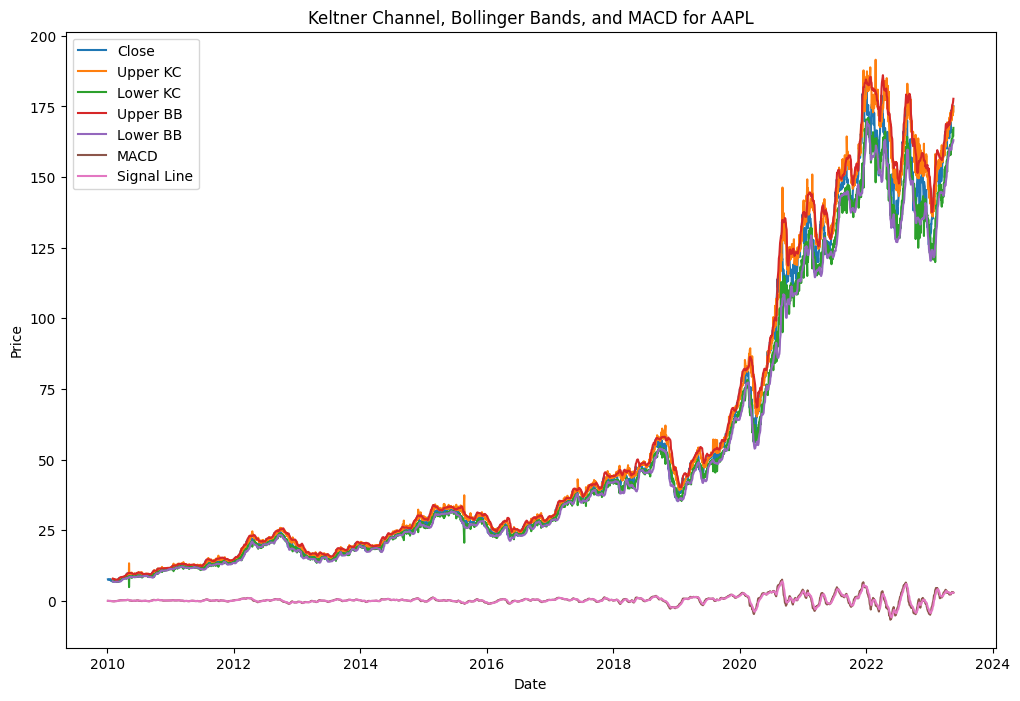

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol and time period
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2023-05-20"

# Fetch the historical stock data using Yahoo Finance API
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Keltner Channel
n = 20  # Number of periods for moving average
k = 2.0  # Keltner Channel factor
stock_data['Typical Price'] = (stock_data['High'] + stock_data['Low'] + stock_data['Close']) / 3
stock_data['MA'] = stock_data['Typical Price'].rolling(window=n).mean()
stock_data['ATR'] = stock_data['High'] - stock_data['Low']
stock_data['Upper KC'] = stock_data['MA'] + k * stock_data['ATR']
stock_data['Lower KC'] = stock_data['MA'] - k * stock_data['ATR']

# Calculate Bollinger Bands
n = 20  # Number of periods for moving average
std_dev = 2  # Standard deviation factor
stock_data['MA'] = stock_data['Close'].rolling(window=n).mean()
stock_data['Std'] = stock_data['Close'].rolling(window=n).std()
stock_data['Upper BB'] = stock_data['MA'] + std_dev * stock_data['Std']
stock_data['Lower BB'] = stock_data['MA'] - std_dev * stock_data['Std']

# Calculate MACD
short_ma = 12  # Short-term moving average period
long_ma = 26  # Long-term moving average period
signal_ma = 9  # Signal line moving average period
stock_data['EMA_short'] = stock_data['Close'].ewm(span=short_ma, adjust=False).mean()
stock_data['EMA_long'] = stock_data['Close'].ewm(span=long_ma, adjust=False).mean()
stock_data['MACD'] = stock_data['EMA_short'] - stock_data['EMA_long']
stock_data['Signal Line'] = stock_data['MACD'].ewm(span=signal_ma, adjust=False).mean()

# Plotting the indicators
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(stock_data.index, stock_data['Close'], label='Close')
ax.plot(stock_data.index, stock_data['Upper KC'], label='Upper KC')
ax.plot(stock_data.index, stock_data['Lower KC'], label='Lower KC')
ax.plot(stock_data.index, stock_data['Upper BB'], label='Upper BB')
ax.plot(stock_data.index, stock_data['Lower BB'], label='Lower BB')
ax.plot(stock_data.index, stock_data['MACD'], label='MACD')
ax.plot(stock_data.index, stock_data['Signal Line'], label='Signal Line')
ax.legend()
plt.title(f"Keltner Channel, Bollinger Bands, and MACD for {ticker}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
